# Analysis Pipeline 

#### Load Modules and setup environment

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# run plots in the notebook
%matplotlib inline

#### Read in data from a URL

In [8]:
url = "http://pbpython.com/extras/sample-salesv2.csv"

sales = pd.read_csv(url)

#### View the first few lines (head) of the sales dataframe

In [9]:
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


#### Get a quick summary of the data

In [10]:
sales.describe()

,account number,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


We can actually learn some pretty helpful info from this simple command:

- We can tell that customers on average purchases 10.3 items per transaction
- The average cost of the transaction was $579.84
- It is also easy to see the min and max so you understand the range of the data

If we want we can look at a single column as well:

In [11]:
sales['unit price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

#### Check on the data types for each column
This helps you make sure you can perform any calculations on the data in the column, if needed

In [12]:
sales.dtypes

account number      int64
name               object
sku                object
category           object
quantity            int64
unit price        float64
ext price         float64
date               object
dtype: object

#### What's the most popular category?  

In [18]:
sales['category'].value_counts()

Shirt    404
Shoes    400
Belt     196
Name: category, dtype: int64

#### Let's visualize that

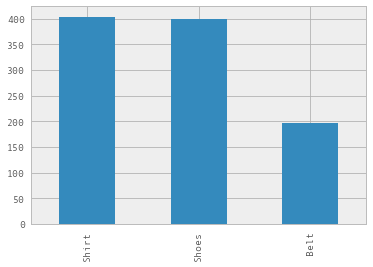

In [19]:
sales['category'].value_counts().plot(kind="bar")

## Let's find out which company sold the most belts

#### Let's subset just the info we want to work with

In [25]:
belt_df = sales[['name', 'category', 'quantity']]
belt_df = belt_df[belt_df['category']== 'Belt']

In [35]:
belt_df.head()

,name,category,quantity
0,Carroll PLC,Belt,13
11,Hegmann and Sons,Belt,6
18,"Kihn, McClure and Denesik",Belt,15
20,"Volkman, Goyette and Lemke",Belt,13
23,Berge LLC,Belt,4


In [53]:
belt_df.sort_values(by='quantity', ascending=False).head(10)

,name,category,quantity
612,Waters-Walker,Belt,20
802,"Senger, Upton and Breitenberg",Belt,20
994,Carroll PLC,Belt,20
268,Hegmann and Sons,Belt,20
853,Berge LLC,Belt,20
538,Huel-Haag,Belt,20
584,Heidenreich-Bosco,Belt,20
505,Cole-Eichmann,Belt,19
283,Kunze Inc,Belt,19
744,Cole-Eichmann,Belt,19


#### We can see there are multiple entries per company, let's group them together

In [54]:
by_company = belt_df.groupby('name')

#### Now we can see how many entries there are for each company

In [56]:
by_company.size()

name
Berge LLC                         9
Carroll PLC                      14
Cole-Eichmann                    13
Davis, Kshlerin and Reilly        6
Ernser, Cruickshank and Lind      9
Gorczany-Hahn                    12
Hamill-Hackett                    4
Hegmann and Sons                 10
Heidenreich-Bosco                10
Huel-Haag                         9
Kerluke, Reilly and Bechtelar     8
Kihn, McClure and Denesik        12
Kilback-Gerlach                   6
Koelpin PLC                      14
Kunze Inc                         6
Kuphal, Zieme and Kub             4
Senger, Upton and Breitenberg    19
Volkman, Goyette and Lemke        8
Waelchi-Fahey                    17
Waters-Walker                     6
dtype: int64

#### Let's sum the counts for each company

In [58]:
belt_totals = by_company.sum()

In [59]:
belt_totals

,quantity
name,
Berge LLC,120
Carroll PLC,184
Cole-Eichmann,147
"Davis, Kshlerin and Reilly",33
"Ernser, Cruickshank and Lind",97
Gorczany-Hahn,103
Hamill-Hackett,32
Hegmann and Sons,88
Heidenreich-Bosco,106


#### And now we can graph the 10 belt sellers

In [63]:
top_sellers = belt_totals.sort_values(by='quantity', ascending=False).head(10)

In [64]:
top_sellers

,quantity
name,
Carroll PLC,184
"Senger, Upton and Breitenberg",171
"Kihn, McClure and Denesik",164
Waelchi-Fahey,149
Cole-Eichmann,147
Koelpin PLC,133
Berge LLC,120
Heidenreich-Bosco,106
Gorczany-Hahn,103


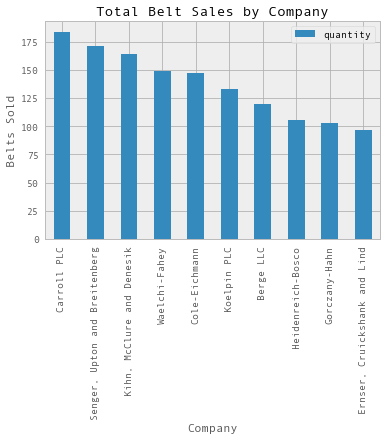

In [69]:
belt_plot = top_sellers.plot(kind="bar", title="Total Belt Sales by Company")
belt_plot.set_xlabel("Company")
belt_plot.set_ylabel("Belts Sold")

## Saving your notebook
You must have properly installed pandoc to save your output to PDF. 
- Click on File
- Click on Download As
- Click on PDF via LaTex (pdf)
- Save your file as a PDF

As a last resort, if you are not able to get pandoc properly installed, saved your notebook as an HTML page to be viewed in a browser. 